In [18]:
import pandas as pd
from src.finance_get import GetData
from src.model_ensemble import GbmModel
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [26]:
ticker_symbol = 'CL=F'
df = yf.download(ticker_symbol)
df = pd.DataFrame(df)
df.index

[*********************100%%**********************]  1 of 1 completed


DatetimeIndex(['2000-08-23', '2000-08-24', '2000-08-25', '2000-08-28',
               '2000-08-29', '2000-08-30', '2000-08-31', '2000-09-01',
               '2000-09-05', '2000-09-06',
               ...
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
               '2024-06-28', '2024-07-01', '2024-07-02', '2024-07-03',
               '2024-07-05', '2024-07-08'],
              dtype='datetime64[ns]', name='Date', length=5993, freq=None)

In [24]:
df['date'] = df.index
df['day_of_week'] = df['date'].dt.dayofweek 
df['month'] = df['date'].dt.month 
df['day'] = df['date'].dt.day

In [27]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601
2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770
2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131
...,...,...,...,...,...,...
2024-07-01,81.449997,83.639999,81.379997,83.379997,83.379997,345780
2024-07-02,83.430000,84.379997,82.720001,82.809998,82.809998,367787
2024-07-03,83.199997,83.930000,82.459999,83.879997,83.879997,289685


In [49]:
get_obj = GetData(ticker_symbol='CL=F')
val_df, vol_df = get_obj.val_vol_datasets(lags=30,step=5)
model = GbmModel(val=val_df, vol= vol_df,n_X=25)
X_train, X_test, y_train, y_test= model.splitting_sum_vol()


[*********************100%%**********************]  1 of 1 completed


In [50]:
import pickle
with open('model_xg.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [51]:
y_pred = loaded_model.predict(X_test)

In [52]:
y_test.reset_index(drop=True,inplace=True)

In [55]:
y_test

,t25,t26,t27,t28,t29
0,51.470001,51.360001,48.900002,49.799999,49.660000
1,48.320000,48.360001,47.660000,47.400002,48.189999
2,45.720001,45.639999,45.830002,46.080002,46.459999
3,44.730000,44.459999,44.740002,44.200001,43.230000
4,42.529999,42.740002,43.009998,43.380001,44.240002
...,...,...,...,...,...
353,79.830002,79.230003,77.910004,76.989998,74.220001
354,73.250000,74.070000,75.550003,75.529999,77.739998
355,77.900002,78.500000,78.620003,78.449997,80.330002
356,81.570000,82.169998,80.730003,81.629997,80.830002


In [56]:
Y_test = []
Y_pred = []
for i in range(0,len(y_test)):
    y_test1 = y_test.iloc[i,:].values.tolist()
    y_pred1 = y_pred[i,:].tolist()
    Y_pred+=y_pred1
    Y_test+=y_test1

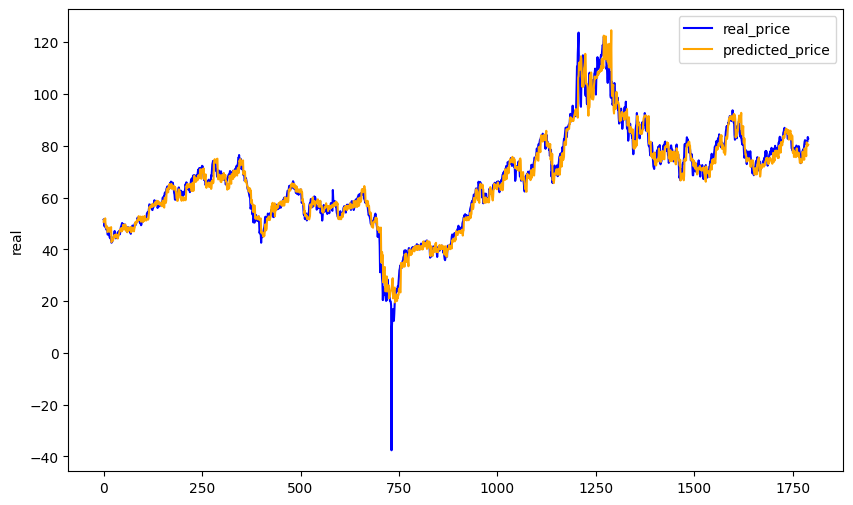

In [57]:
df_y = pd.DataFrame({
    'pred': Y_pred,
    'real': Y_test
})
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_y['real'], color='blue', label='real_price')
sns.lineplot(data=df_y['pred'], color='orange', label='predicted_price')
plt.legend()
plt.show()

In [58]:
y_test.iloc[0].values.tolist()

[51.470001220703125,
 51.36000061035156,
 48.900001525878906,
 49.79999923706055,
 49.65999984741211]

In [59]:
def get_df(i:int=0):
    one_xtest = X_test.drop(columns='sum_vol').iloc[i].values.tolist()
    one_xtest_withnulls = one_xtest + [None]*5

    onepred = y_pred[i].tolist()
    onepred_withnulls = [None]*25 + onepred

    one_ytest = y_test.iloc[i].values.tolist()
    one_ytest_withnulls = [None]*25 + one_ytest

    one_true = X_test.drop(columns='sum_vol').iloc[i].values.tolist() + y_test.iloc[i].values.tolist()

    df_oneexemple = pd.DataFrame({
        'one_true': one_true,
        'one_x': one_xtest_withnulls,
        'one_pred' : onepred_withnulls,
        'one_y' : one_ytest_withnulls
    })
    return df_oneexemple

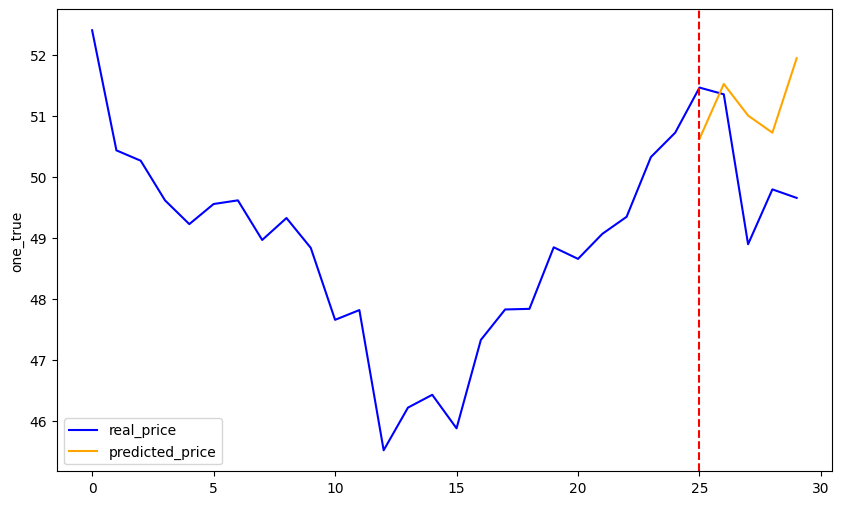

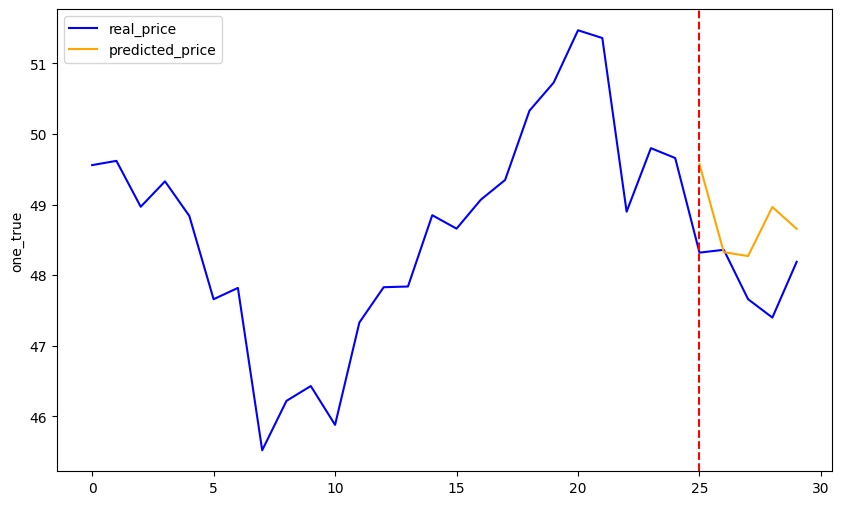

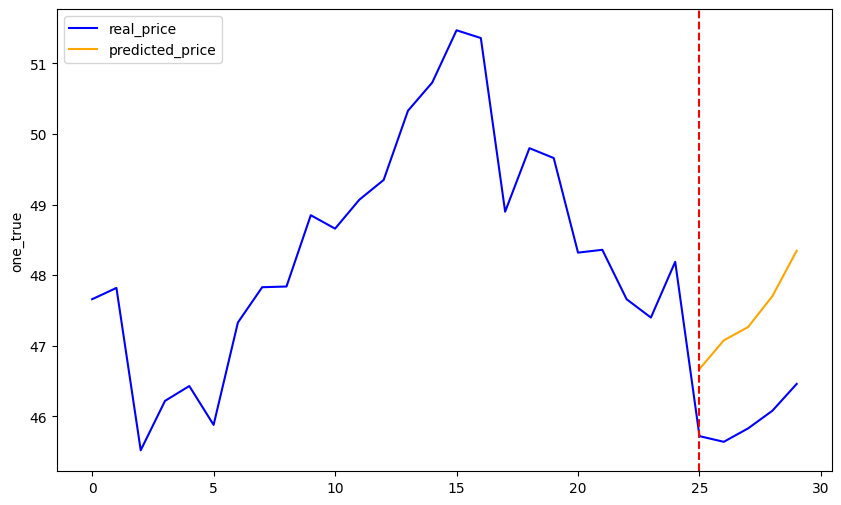

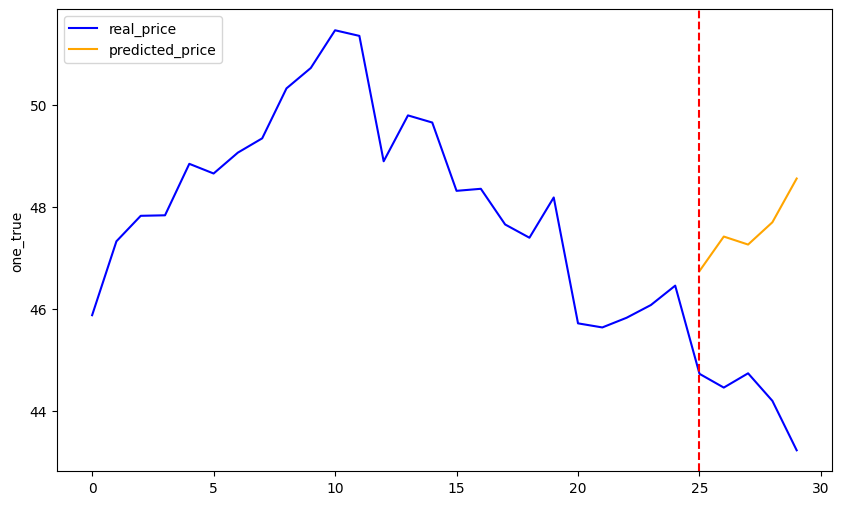

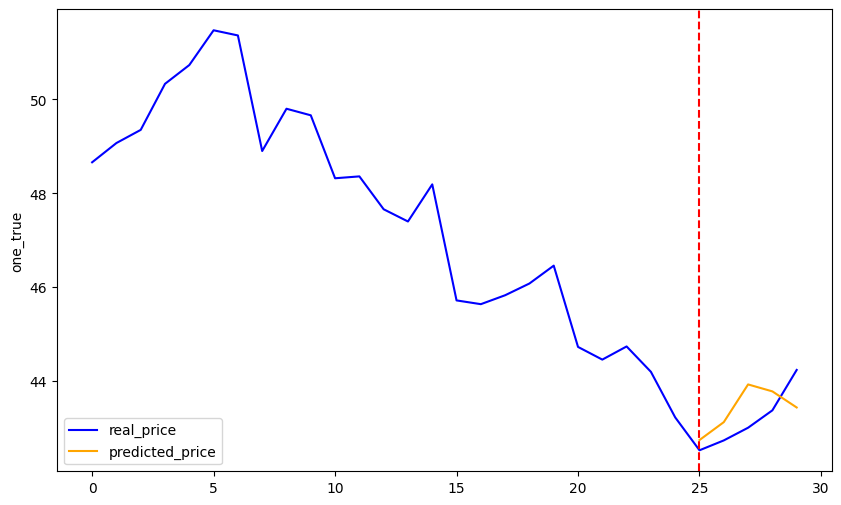

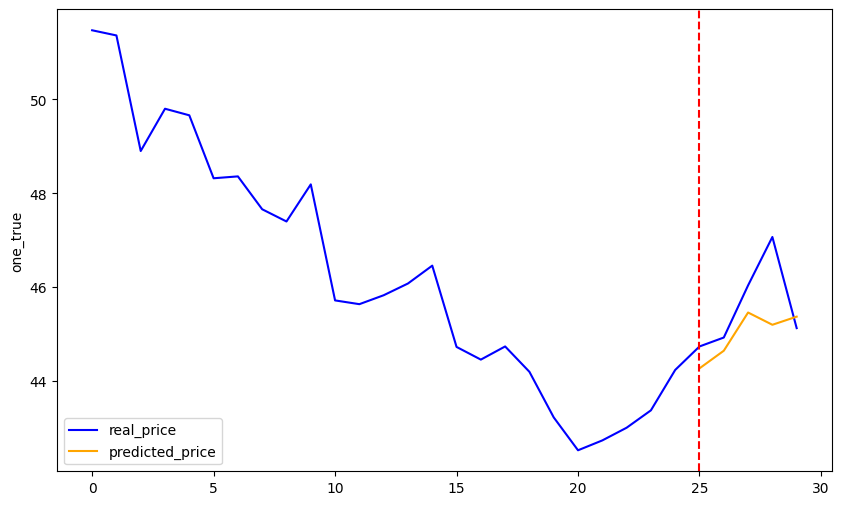

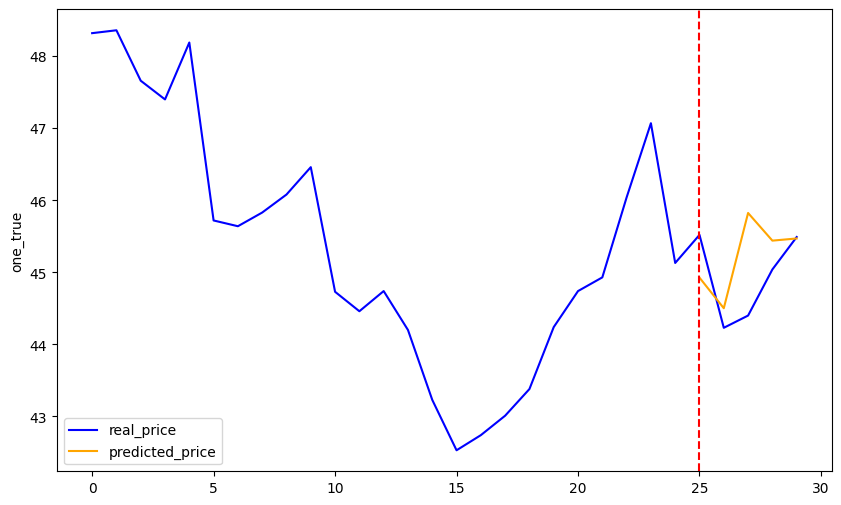

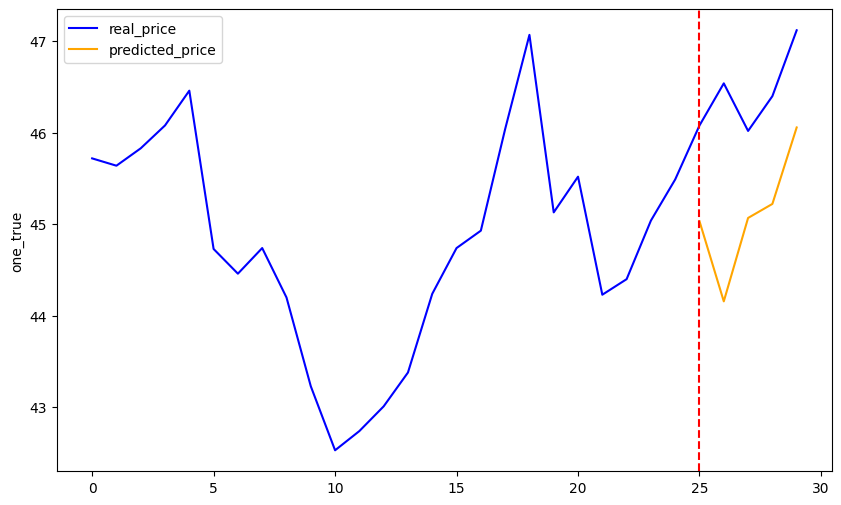

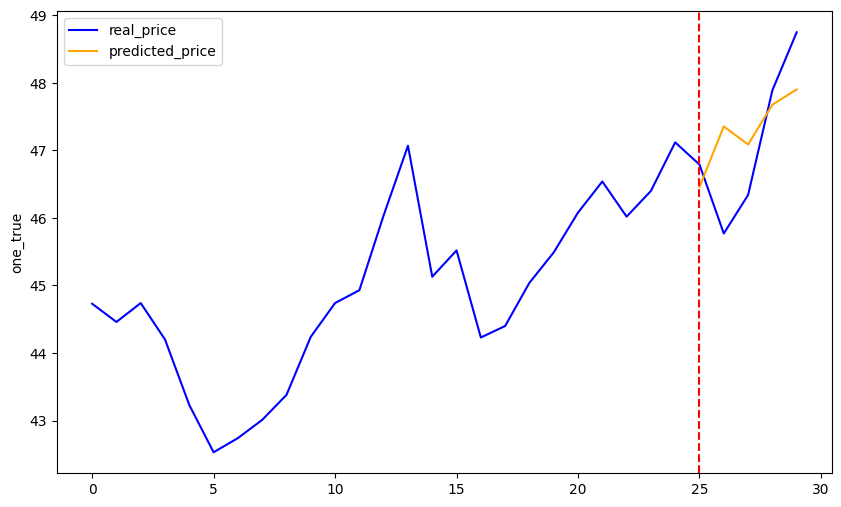

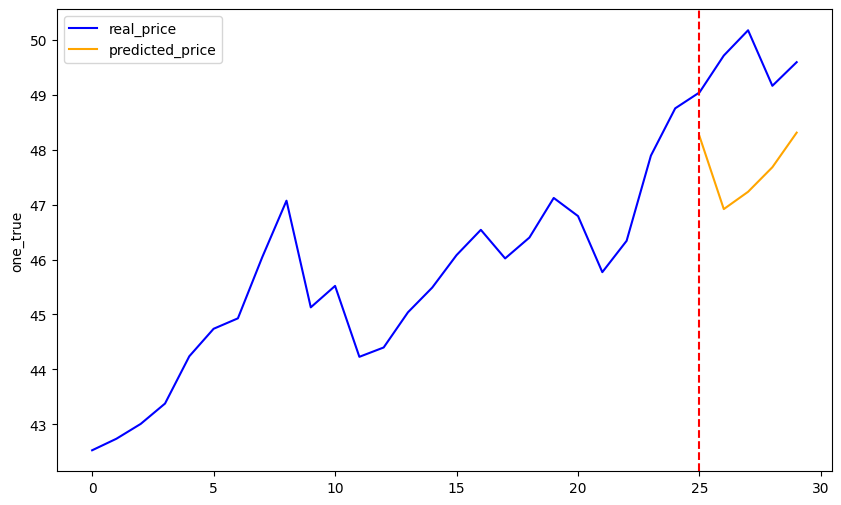

In [60]:
for i in range(10):
    df_oneexemple = get_df(i)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_oneexemple['one_true'], color='blue', label='real_price')
    sns.lineplot(data=df_oneexemple['one_pred'], color='orange', label='predicted_price')
    plt.axvline(x=25, color='r', linestyle= '--')
    plt.legend()
    plt.show()